### **PROBLEM STATEMENT**

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

### **OBJECTIVE**

Create a Clustering Model to identify customer segments that are suitable for marketing new products based on customer personality in transaction activities with a Silhouette Score > 0.7

### **CONTENT**

**ID**: Customer's unique identifier\
**Year_Birth**: Customer's birth year\
**Education**: Customer's education level\
**Marital_Status**: Customer's marital status\
**Income**: Customer's yearly household income\
**Kidhome**: Number of children in customer's household\
**Teenhome**: Number of teenagers in customer's household\
**Dt_Customer**: Date of customer's enrollment with the company\
**Recency**: Number of days since customer's last purchase\
**Complain**: 1 if the customer complained in the last 2 years, 0 otherwise

**MntWines**: Amount spent on wine in last 2 years\
**MntFruits**: Amount spent on fruits in last 2 years\
**MntMeatProducts**: Amount spent on meat in last 2 years\
**MntFishProducts**: Amount spent on fish in last 2 years\
**MntSweetProducts**: Amount spent on sweets in last 2 years\
**MntGoldProds**: Amount spent on gold in last 2 years

**NumDealsPurchases**: Number of purchases made with a discount\
**AcceptedCmp1**: 1 if customer accepted the offer in the 1st campaign, 0 otherwise\
**AcceptedCmp2**: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise\
**AcceptedCmp3**: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise\
**AcceptedCmp4**: 1 if customer accepted the offer in the 4th campaign, 0 otherwise\
**AcceptedCmp5**: 1 if customer accepted the offer in the 5th campaign, 0 otherwise\
**Response**: 1 if customer accepted the offer in the last campaign, 0 otherwise

**NumWebPurchases**: Number of purchases made through the company’s website\
**NumCatalogPurchases**: Number of purchases made using a catalogue\
**NumStorePurchases**: Number of purchases made directly in stores\
**NumWebVisitsMonth**: Number of visits to company’s website in the last month

### **EXPERIMENT**

1. Grouped based on demographics to look for transaction patterns on products
2. Grouped based on demographics to look for transaction patterns during promotions
3. Grouped based on demographics to look for patterns where transactions occurred
4. Grouped based on transactions for a product to search for patterns based on demographics
5. Grouped based on transactions during promotions to search patterns based on demographics
6. Grouped based on where the transactions occurred to search for patterns based on demographics

### **Import Package**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

C:\Users\muham\AppData\Local\Temp\ipykernel_37412\3347886854.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
pd.set_option('display.max_columns', None)

### **Data**

In [4]:
data = pd.read_csv('marketing_campaign.csv',sep='\t')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [5]:
data.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

### **Data Understanding**

In [ ]:
data0 = pd.DataFrame(\
                     data.groupby(by=["Year_Birth"])['Year_Birth']\
                     .count()\
                     .reset_index(name='Amount'))

<Axes: xlabel='Year_Birth'>

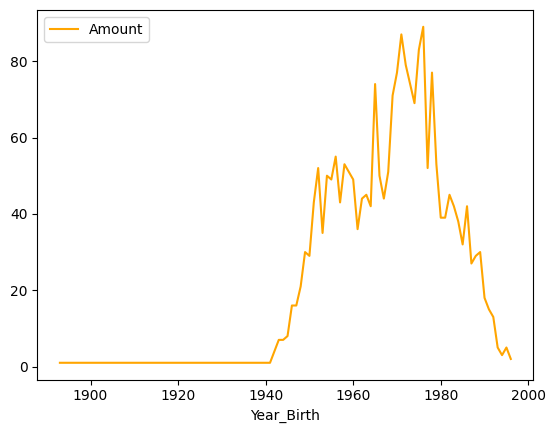

In [53]:
data0.plot('Year_Birth', 'Amount', color='orange')

In [33]:
data1 = pd.DataFrame(\
                     data.groupby(by=["Year_Birth"])[["MntWines", 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]\
                     .mean()\
                     .reset_index())
data1.head()

,Year_Birth,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,1893,8.0,0.0,5.0,7.0,0.0,2.0
1,1899,755.0,144.0,562.0,104.0,64.0,224.0
2,1900,15.0,6.0,8.0,7.0,4.0,25.0
3,1940,144.0,0.0,7.0,0.0,0.0,6.0
4,1941,1285.0,42.0,716.0,55.0,0.0,21.0


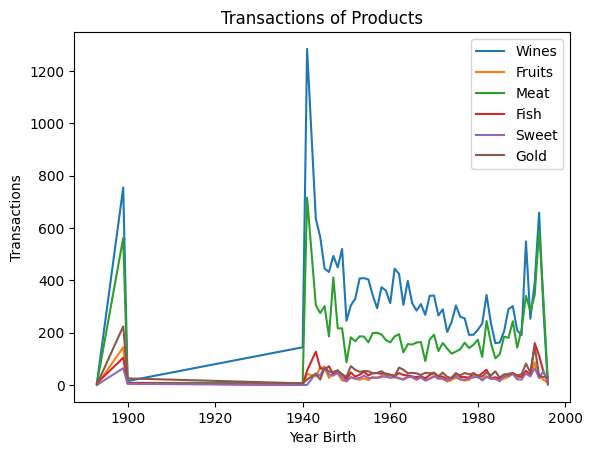

In [57]:

fig = plt.figure()
ax = fig.add_subplot()
x1 = data1['Year_Birth']
y1 = data1['MntWines']
y2 = data1['MntFruits']
y3 = data1['MntMeatProducts']
y4 = data1['MntFishProducts']
y5 = data1['MntSweetProducts']
y6 = data1['MntGoldProds']
ax.plot(x1, y1, label='Wines')
ax.plot(x1, y2, label='Fruits')
ax.plot(x1, y3, label='Meat')
ax.plot(x1, y4, label='Fish')
ax.plot(x1, y5, label='Sweet')
ax.plot(x1, y6, label='Gold')
ax.set_xlabel('Year Birth')
ax.set_ylabel('Transactions')
ax.set_title("Transactions of Products")
ax.legend()

In [54]:
data.groupby(('Education'))['Education'].count()

Education
2n Cycle       203
Basic           54
Graduation    1127
Master         370
PhD            486
Name: Education, dtype: int64

In [63]:
data2 = pd.DataFrame(\
                     data.groupby(by=["Education"])[["MntWines", 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]\
                     .mean()\
                     .reset_index())
data2

,Education,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,2n Cycle,198.182266,28.955665,141.256158,47.482759,34.251232,46.399015
1,Basic,7.240741,11.111111,11.444444,17.055556,12.111111,22.833333
2,Graduation,284.268855,30.774623,179.488909,43.149956,31.367347,50.849157
3,Master,333.075676,21.654054,163.378378,32.100000,21.175676,40.397297
4,PhD,404.495885,20.049383,168.602881,26.728395,20.222222,32.310700


In [62]:
data.groupby(('Marital_Status'))['Marital_Status'].count()

Marital_Status
Absurd        2
Alone         3
Divorced    232
Married     864
Single      480
Together    580
Widow        77
YOLO          2
Name: Marital_Status, dtype: int64

In [64]:
data3 = pd.DataFrame(\
                     data.groupby(by=["Marital_Status"])[["MntWines", 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]\
                     .mean()\
                     .reset_index())
data3

,Marital_Status,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,Absurd,355.500000,84.500000,312.500000,205.500000,30.500000,204.000000
1,Alone,184.666667,4.000000,26.333333,7.666667,7.000000,27.000000
2,Divorced,324.844828,27.426724,150.206897,35.043103,26.818966,46.288793
3,Married,299.480324,25.734954,160.681713,35.380787,26.701389,42.822917
4,Single,288.331250,26.835417,182.108333,38.216667,27.262500,43.729167
5,Together,306.825862,25.350000,168.103448,38.991379,26.122414,42.994828
6,Widow,369.272727,33.090909,189.285714,51.389610,39.012987,56.766234
7,YOLO,322.000000,3.000000,50.000000,4.000000,3.000000,42.000000
